Exploratory Data Analysis

Roles to Explore


In [1]:
import pandas as pd
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()
df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df["job_skills"]=df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


filter for US Data Engineer roles

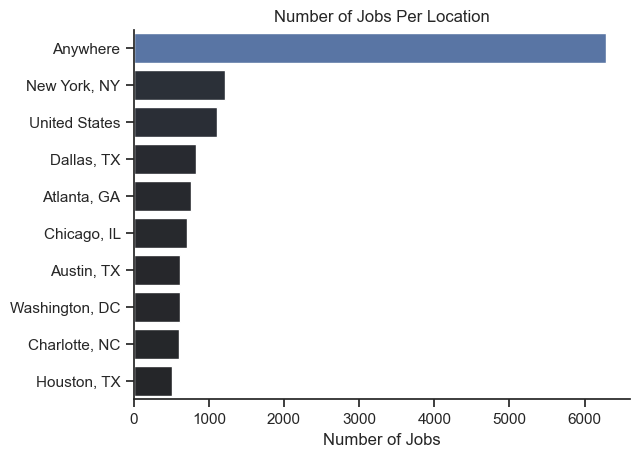

In [3]:
df_DE_US = df[(df["job_title_short"]=="Data Engineer") & (df["job_country"]=="United States")].copy()
df_plot=df_DE_US["job_location"].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(data=df_plot,x="count",y="job_location",hue="count",palette="dark:b",legend=False)
sns.despine()
plt.title("Number of Jobs Per Location")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

Top 10 companies hiring for Data Engineer 

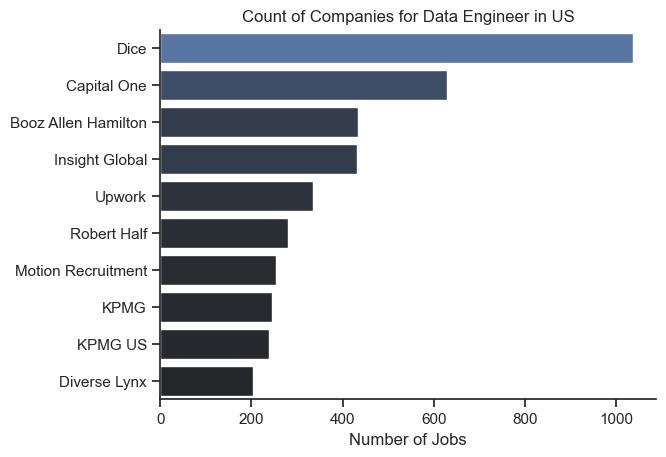

In [4]:
df_plot=df_DE_US["company_name"].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(data=df_plot,x="count",y="company_name",hue="count",palette="dark:b",legend=False)
sns.despine()
plt.title("Count of Companies for Data Engineer in US")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()